## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format) 

In [2]:
dataset = pd.read_csv("D:\Download here\Real_Estate_Sales_2001-2022_GL (1).csv", low_memory=False)

## Understand Data

In [3]:
dataset

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.00,232000.00,0.60,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984)
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.00,325000.00,0.46,Commercial,NaN,NaN,NaN,NaN,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.00,430000.00,0.59,Residential,Single Family,NaN,NaN,NaN,NaN
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.00,805000.00,0.41,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.00,179900.00,0.72,Residential,Condo,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.00,53100.00,1.14,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
1097625,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.00,76000.00,0.90,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
1097626,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.00,210000.00,0.58,Single Family,Single Family,NaN,NaN,NaN,NaN
1097627,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.00,280000.00,0.73,Single Family,Single Family,NaN,NaN,NaN,NaN


In [4]:
#Check if null values exist at the first look
dataset.isnull()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,False,False,False,False,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1097625,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1097626,False,False,False,False,False,False,False,False,False,False,True,True,True,True
1097627,False,False,False,False,False,False,False,False,False,False,True,True,True,True


In [5]:
#Check number of rows and columns
dataset.shape

(1097629, 14)

In [6]:
#Check data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


## Data Cleaning

In [7]:
#Check percentage of nulls in each field
percentage_nulls = dataset.isnull().mean() * 100
percentage_nulls

Serial Number       0.00
List Year           0.00
Date Recorded       0.00
Town                0.00
Address             0.00
Assessed Value      0.00
Sale Amount         0.00
Sales Ratio         0.00
Property Type      34.84
Residential Type   36.30
Non Use Code       71.44
Assessor Remarks   84.40
OPM remarks        98.81
Location           72.84
dtype: float64

In [8]:
#Drop columns that has percentage of nulls more than 80%
dropped_columns = percentage_nulls[percentage_nulls > 80].index
dataset = dataset.drop(columns=dropped_columns)

### Drop or Fill N/A Values

In [9]:
dataset['Date Recorded'] = dataset['Date Recorded'].fillna("Unknown")

In [10]:
dropped_rows = dataset[(dataset['Address'].isnull() & dataset['Location'].isnull())].index
dataset = dataset.drop(index=dropped_rows)

In [11]:
dataset[dataset['Property Type'].isnull()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Location
67,10095,2001,11/16/2001,Farmington,5 SPARROW LN,67670.00,302866.00,0.22,NaN,NaN,7,NaN
69,11238,2001,08/30/2002,Bethel,50 FOURTH ST,76450.00,50000.00,1.53,NaN,NaN,8,NaN
70,10035,2001,06/28/2002,Chaplin,FEDERAL RD,19000.00,35000.00,0.54,NaN,NaN,NaN,NaN
71,10115,2001,02/01/2002,Clinton,42 PRATT RD,121900.00,230000.00,0.53,NaN,NaN,NaN,NaN
80,10041,2001,07/17/2002,Eastford,WESTFORD RD,180.00,5000.00,0.04,NaN,NaN,28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1097573,19150,2019,01/13/2020,Newtown,22 WASHINGTON AVENUE,53640.00,122500.00,0.44,NaN,NaN,NaN,NaN
1097581,190242,2019,09/18/2020,Weston,OLD HYDE ROAD,181440.00,150000.00,1.21,NaN,NaN,08 - Part Interest,NaN
1097582,19000067,2019,05/19/2020,New Hartford,LOT 2 DINGS RD,87955.00,35000.00,2.51,NaN,NaN,28 - Use Assessment,POINT (-73.02432 41.83788)
1097590,190713,2019,06/01/2020,New Haven,1083 WHALLEY AV,262220.00,325000.00,0.81,NaN,NaN,25 - Other,POINT (-72.96622 41.32883)


In [12]:
dataset['Property Type'] = dataset['Property Type'].fillna("Unknown")
dataset['Residential Type'] = dataset['Residential Type'].fillna("Unknown")
dataset['Non Use Code'] = dataset['Non Use Code'].fillna("None")

In [13]:
#Check percentage of nulls in each field
percentage_nulls = dataset.isnull().mean() * 100
percentage_nulls

Serial Number       0.00
List Year           0.00
Date Recorded       0.00
Town                0.00
Address             0.00
Assessed Value      0.00
Sale Amount         0.00
Sales Ratio         0.00
Property Type       0.00
Residential Type    0.00
Non Use Code        0.00
Location           72.84
dtype: float64

### Remove Duplicates

In [14]:
if not dataset.duplicated().any():
    print("No duplicated rows")
else:
    print("Duplicated row indices:", dataset.index[dataset.duplicated()].tolist())

No duplicated rows


In [15]:
if not dataset.duplicated(subset=["Address", "Date Recorded", "Sales Ratio"], keep=False).any():
    print("No duplicates")
else:
    duplicated_index = dataset.index[dataset.duplicated(subset=["Address", "Date Recorded", "Sales Ratio"], keep=False)]
    duplicated_table = dataset.loc[duplicated_index]
    duplicated_table = duplicated_table.sort_values(by="Address")
    duplicated_table = duplicated_table.drop_duplicates(subset=["Address", "Date Recorded", "Sales Ratio"], keep='last')
    duplicated_table.to_csv('removed_duplicates.csv', index=False)
    print("Duplicated rows saved to csv")

Duplicated rows saved to csv


In [16]:
dataset = dataset.drop_duplicates(subset=["Address", "Date Recorded", "Sales Ratio"], keep='last')

### Detect Inconsistent Values

In [17]:
dataset['Non Use Code'].unique()
#The 'Non Use Code' column is inconsistent, mixing prefixes and descriptions
#Split it into two columns: prefix and description
#Standardize prefixes with identical meanings but different formats.

array(['None', '08 - Part Interest', '14 - Foreclosure', '25 - Other',
       '01 - Family', '12 - Non Buildable Lot', '7', '8', '28',
       '10 - A Will', '24', '1', '07 - Change in Property', '25', '3',
       '18', '6', '17', '26 - Rehabilitation Deferred', '09 - Tax',
       '03 - Inter Corporation', '16 - Charitable Group',
       '28 - Use Assessment', '06 - Portion of Property',
       '02 - Love and Affection', '17 - Two Towns', '24 - Plottage',
       '05 - Deed Date', '18 - In Lieu Of Foreclosure', '12',
       '04 - Correcting Deed', '19 - Easement', '15 - Government Agency',
       '11 - Court Order',
       '27 - CRUMBLING FOUNDATION ASSESSMENT REDUCTION',
       '21 - Personal Property Exchange', '2',
       '22 - Money and Personal Property', '13 - Bankrupcy', '15',
       '30 - Auction', '23 - Zoning', 'Single Family', '14',
       '20 - Cemetery', '29', '30', '19', '10', '11', '21', '4', '16',
       '29 - No Consideration', '13', '9', '22', '23', '5', '26', '33',
   

In [18]:
non_use_code = pd.Series(dataset['Non Use Code'])

In [19]:
split_columns = dataset["Non Use Code"].str.rsplit("-", n=1, expand=True)
dataset[["non_use_code_prefix", "non_use_code_desc"]] = split_columns

In [20]:
dataset = dataset.drop(columns=["Non Use Code"])

In [21]:
dataset["non_use_code_prefix"] = dataset["non_use_code_prefix"].str.strip()

In [22]:
sorted(dataset["non_use_code_prefix"].unique())

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '37',
 '38',
 '4',
 '48',
 '5',
 '55',
 '6',
 '68',
 '7',
 '73',
 '74',
 '75',
 '8',
 '88',
 '9',
 'None',
 'Single Family']

In [23]:
isZero = dataset["non_use_code_prefix"].str[0] == "0"
dataset.loc[isZero, "non_use_code_prefix"] = dataset["non_use_code_prefix"].str.replace("0", " ")
dataset["non_use_code_prefix"] = dataset["non_use_code_prefix"].str.strip()

In [24]:
sorted(dataset["non_use_code_prefix"].unique())

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '37',
 '38',
 '4',
 '48',
 '5',
 '55',
 '6',
 '68',
 '7',
 '73',
 '74',
 '75',
 '8',
 '88',
 '9',
 'None',
 'Single Family']

In [25]:
isOutlier = dataset["non_use_code_prefix"] == "Single Family"
dataset.loc[isOutlier]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,non_use_code_prefix,non_use_code_desc
17831,200468,2020,05/19/2021,Groton,59 C ST,9870.00,27000.00,0.37,Unknown,Unknown,POINT (-72.05231 41.34105),Single Family,None
1032708,19037,2019,03/02/2020,Canterbury,99 NO SOCIETY RD,132200.00,205000.00,0.64,Unknown,Unknown,NaN,Single Family,None
1078395,19031,2019,02/05/2020,Canterbury,183 BUCK HILL RD,155100.00,250000.00,0.62,Unknown,Unknown,NaN,Single Family,None


In [26]:
dataset.loc[isOutlier, 'Residential Type'] = dataset.loc[isOutlier, 'Residential Type'].replace(to_replace="Unknown",value="Single Family")
dataset.loc[isOutlier, 'non_use_code_prefix'] = dataset.loc[isOutlier, 'non_use_code_prefix'].replace(to_replace="Single Family",value="None")

In [27]:
sorted(dataset["non_use_code_prefix"].unique())

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '37',
 '38',
 '4',
 '48',
 '5',
 '55',
 '6',
 '68',
 '7',
 '73',
 '74',
 '75',
 '8',
 '88',
 '9',
 'None']

In [28]:
#Split Location into Latitude and Longitude values
dataset.loc[dataset['Location'].notnull(), 'Location'] = dataset.loc[dataset['Location'].notnull(), 'Location'].str.replace("POINT", " ")
dataset.loc[dataset['Location'].notnull(), 'Location'] = dataset.loc[dataset['Location'].notnull(), 'Location'].str.replace(r"[()]", " ", regex=True)
dataset.loc[dataset['Location'].notnull(), 'Location'] = dataset.loc[dataset['Location'].notnull(), 'Location'].str.strip()
latlong = dataset.loc[dataset['Location'].notnull(), 'Location'].str.split(" ",n=2,expand=True)
dataset[["Latitude", "Longitude"]] = latlong

In [29]:
dataset = dataset.drop(columns="Location")

In [30]:
dataset["Latitude"] = pd.to_numeric(dataset["Latitude"], errors="coerce")
dataset["Longitude"] = pd.to_numeric(dataset["Longitude"], errors="coerce")

In [31]:
dataset['Date Recorded'] = pd.to_datetime(dataset['Date Recorded'])
dataset['Sales Year'] = dataset['Date Recorded'].dt.year

In [32]:
dataset

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,non_use_code_prefix,non_use_code_desc,Latitude,Longitude,Sales Year
0,220008,2022,2023-01-30,Andover,618 ROUTE 6,139020.00,232000.00,0.60,Residential,Single Family,None,None,-72.34,41.73,2023
1,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.00,325000.00,0.46,Commercial,Unknown,None,None,NaN,NaN,2021
2,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.00,430000.00,0.59,Residential,Single Family,None,None,NaN,NaN,2020
3,210317,2021,2022-07-05,Avon,53 COTSWOLD WAY,329730.00,805000.00,0.41,Residential,Single Family,None,None,-72.85,41.78,2022
4,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.00,179900.00,0.72,Residential,Condo,None,None,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,190272,2019,2020-06-24,New London,4 BISHOP CT,60410.00,53100.00,1.14,Single Family,Single Family,14,Foreclosure,NaN,NaN,2020
1097625,190284,2019,2019-11-27,Waterbury,126 PERKINS AVE,68280.00,76000.00,0.90,Single Family,Single Family,25,Other,NaN,NaN,2019
1097626,190129,2019,2020-04-27,Windsor Locks,19 HATHAWAY ST,121450.00,210000.00,0.58,Single Family,Single Family,None,None,NaN,NaN,2020
1097627,190504,2019,2020-06-03,Middletown,8 BYSTREK DR,203360.00,280000.00,0.73,Single Family,Single Family,None,None,NaN,NaN,2020


In [33]:
#Detect and drop rows with Sales Year > List Year
dataset['No. Waiting Years'] = dataset['Sales Year'] - dataset['List Year']
filtered_data = dataset[dataset['No. Waiting Years'] < 0]
dataset = dataset.drop(filtered_data.index)

In [34]:
dataset['No. Waiting Years'].unique()

array([1, 0, 3, 2, 4])

## Exploratory Data Analysis

### Detect Outliers

In [35]:
columns_ = ['Assessed Value', 'Sale Amount', 'Sales Ratio']
dataset[columns_].describe()

#Abnormally small min values (value and sales = 0), abnormally large max values.
#The mean and median are far apart, indicating potential outliers.

,Assessed Value,Sale Amount,Sales Ratio
count,1088420.00,1088420.00,1088420.00
mean,281773.80,406396.77,9.49
std,1663115.94,5164960.71,1805.77
min,0.00,0.00,0.00
25%,89030.00,145000.00,0.48
50%,140420.00,234000.00,0.61
75%,227920.00,375000.00,0.77
max,881510000.00,5000000000.00,1226420.00


<Axes: xlabel='Assessed Value'>

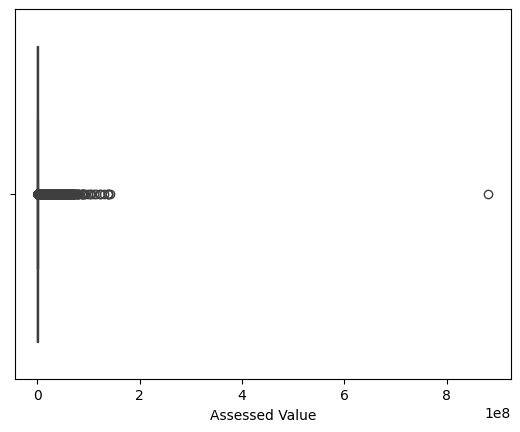

In [36]:
sns.boxplot(x=dataset['Assessed Value'])

In [37]:
#Drop rows outside the lower limit and upper limit
q1= dataset['Assessed Value'].quantile(0.25)
q3= dataset['Assessed Value'].quantile(0.75)
iqr = q3 - q1
lowerLimit = q1 - 1.5*iqr
upperLimit = q3 + 1.5*iqr
dropped_index = dataset.loc[dataset['Assessed Value'] > upperLimit].index
dataset = dataset.drop(dropped_index)

<Axes: xlabel='Sale Amount'>

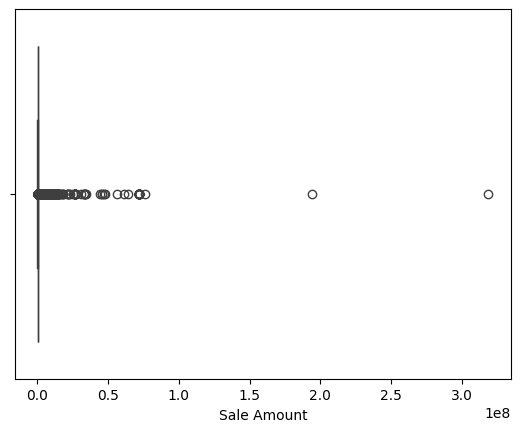

In [38]:
sns.boxplot(x=dataset['Sale Amount'])

In [39]:
#Drop rows outside the lower limit and upper limit
q1_ = dataset['Sale Amount'].quantile(0.25)
q3_= dataset['Sale Amount'].quantile(0.75)
iqr_ = q3_ - q1_
lowerLimit_ = q1_ - 1.5*iqr_
upperLimit_ = q3_ + 1.5*iqr_
dropped_index_ = dataset[dataset['Sale Amount'] > upperLimit_].index
dataset = dataset.drop(dropped_index_)

<Axes: xlabel='Sales Ratio'>

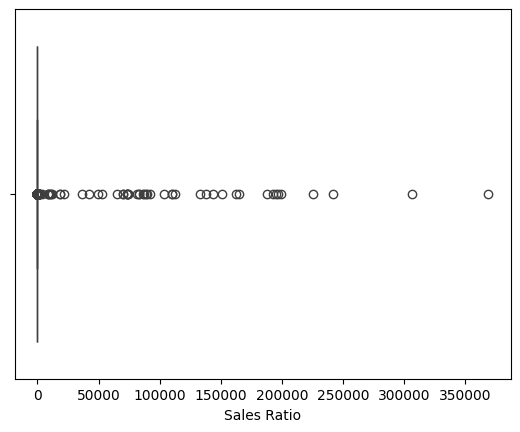

In [40]:
sns.boxplot(x=dataset['Sales Ratio'])

In [41]:
#Drop rows outside the lower limit and upper limit
q1_1 = dataset['Sales Ratio'].quantile(0.25)
q3_1 = dataset['Sales Ratio'].quantile(0.75)
iqr1 = q3_1 - q1_1
lowerLimit1 = q1_1 - 1.5*iqr1
upperLimit1 = q3_1 + 1.5*iqr1
dropped_index_1 = dataset.loc[(dataset['Sales Ratio'] < lowerLimit1) | (dataset['Sales Ratio'] > upperLimit1)].index
dataset = dataset.drop(dropped_index_1)

### Distribution Plots

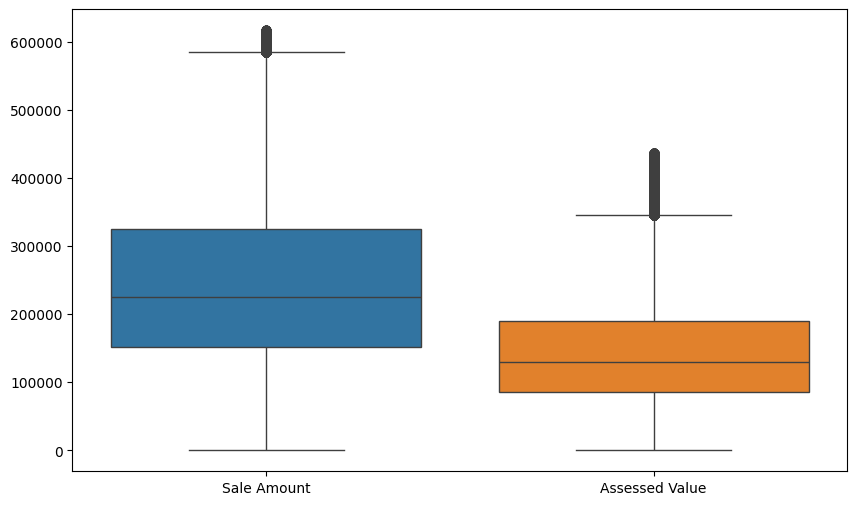

In [42]:
data = dataset[['Sale Amount', 'Assessed Value']]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.show()

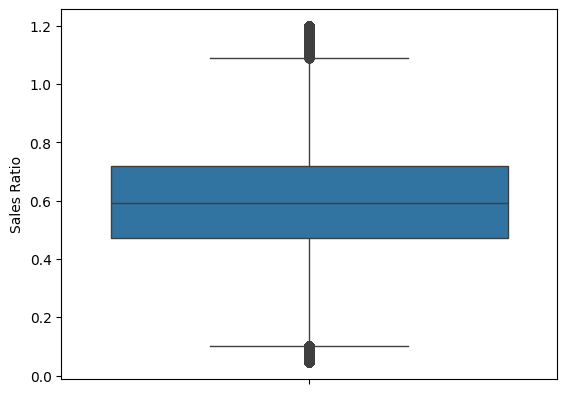

In [43]:
sns.boxplot(dataset['Sales Ratio'])
plt.show()

In [44]:
dataset[columns_].describe()

,Assessed Value,Sale Amount,Sales Ratio
count,860599.00,860599.00,860599.00
mean,144280.28,246294.71,0.61
std,81593.36,127544.20,0.20
min,70.00,300.00,0.05
25%,85060.00,152000.00,0.47
50%,129290.00,225000.00,0.59
75%,189340.00,325000.00,0.72
max,436250.00,616500.00,1.20


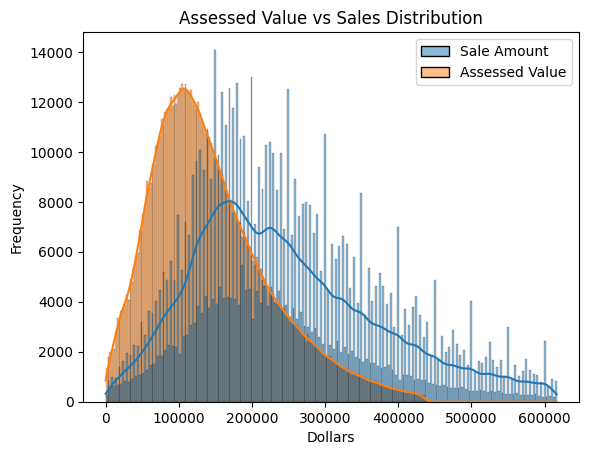

In [45]:
sns.histplot(data, kde=True)
plt.title("Assessed Value vs Sales Distribution")
plt.xlabel("Dollars")
plt.ylabel("Frequency")
plt.show()

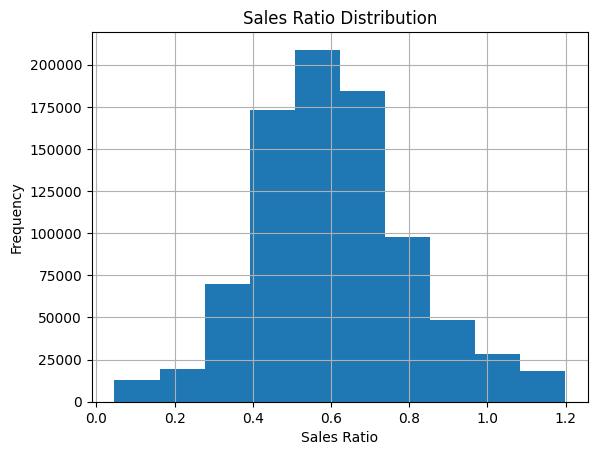

In [46]:
dataset['Sales Ratio'].hist()
plt.title("Sales Ratio Distribution")
plt.xlabel("Sales Ratio")
plt.ylabel("Frequency")
plt.show()

In [47]:
columns = ['Assessed Value', 'Sale Amount', 'Sales Ratio']
skewness = dataset[columns].skew()
kurtosis = dataset[columns].kurt()
result = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print(result)

                Skewness  Kurtosis
Assessed Value      0.86      0.54
Sale Amount         0.66     -0.04
Sales Ratio         0.32      0.36


**Quick Look**

Sales Amount, Assessed Value, and Sales Ratio have:
* Mean # Median
* Skewness > 0
* Kurtosis < 3 -> Skewed distributions
  
*Apply Chebyshev's Theorem, resulting in:*

In [48]:
muy = [dataset['Assessed Value'].mean(), dataset['Sale Amount'].mean(), dataset['Sales Ratio'].mean()]
std = [dataset['Assessed Value'].std(), dataset['Sale Amount'].std(), dataset['Sales Ratio'].std()]
z = [2,3,4]

chebyshev = []
for i in range(len(muy)):
    cell = []
    for k in z:
        lowerBound = "{:.2f}".format(max(muy[i] - k*std[i], 0))
        upperBound = "{:.2f}".format(muy[i] + k*std[i])
        cell.append((lowerBound, upperBound))
    chebyshev.append(cell)
chebyshev_df = pd.DataFrame(chebyshev, index=['Assessed Value', 'Sale Amount', 'Sales Ratio'], columns=["75%", "89%", "94%"])
chebyshev_df

,75%,89%,94%
Assessed Value,"(0.00, 307467.01)","(0.00, 389060.38)","(0.00, 470653.74)"
Sale Amount,"(0.00, 501383.12)","(0.00, 628927.32)","(0.00, 756471.52)"
Sales Ratio,"(0.21, 1.01)","(0.01, 1.21)","(0.00, 1.41)"


### *Observation 1:*

From the Histogram and calculations based on Chebyshev's Theorem:
* Around 75% of real estates are listed under (307,467) and sold under (501,383.12).
* Around 89% of real estates are listed under (389,060) and sold under (628,927).
* Around 94% of real estates are listed under (470,653) and sold under (756,471.12).
* The distribution of Assessed Value has high kurtosis, while Sale Amount has negative kurtosis, indicating that the **distribution of Assessed Value is tightly concentrated around the mean value (144,280)**, whereas the **Sale Amount distribution is more spread out**.
* The distribution of Sales Ratio is close to symmetric (skewness = 0.32), with most data concentrated around mean = 0.61. The mean of the sales ratio is below 1, indicating that **most real estates are likely sold at a price higher than their assessed value**.
* **Most real estate sales prices can be priced at approximately (1/0.61 = 1.64) times the assessed value**.

### Bar Chart

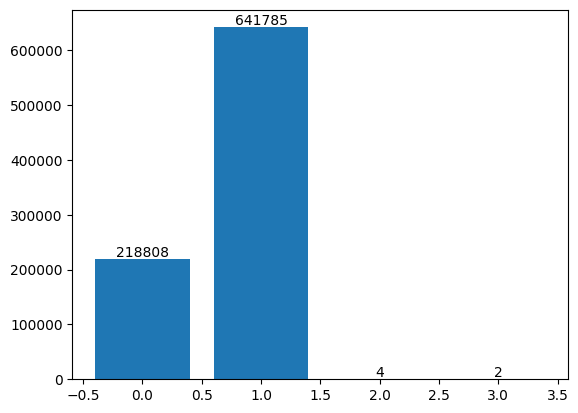

In [49]:
counts_years = dataset['No. Waiting Years'].value_counts()
x = counts_years.index
y = counts_years.values
barchart = plt.bar(x,y)
for bar in barchart:
    label = bar.get_height()
    pltx = bar.get_x() + bar.get_width() / 2
    plty = label + 3
    plt.text(pltx, plty, str(label), ha="center", va="bottom")
plt.show()

In [50]:
percentage_zero_waiting_years = counts_years.get(0)/dataset['No. Waiting Years'].value_counts().sum() * 100
percentage_one_waiting_years = counts_years.get(1)/dataset['No. Waiting Years'].value_counts().sum() * 100
print(f"Zero waiting year: {percentage_zero_waiting_years:.2f}%")
print(f"One waiting year: {percentage_one_waiting_years:.2f}%")

Zero waiting year: 25.43%
One waiting year: 74.57%


### *Observation 2:*

* 74.57% of real estates sold after one year were listed.
* 25.43% of real estates sold within one year were listed.

### Line Charts

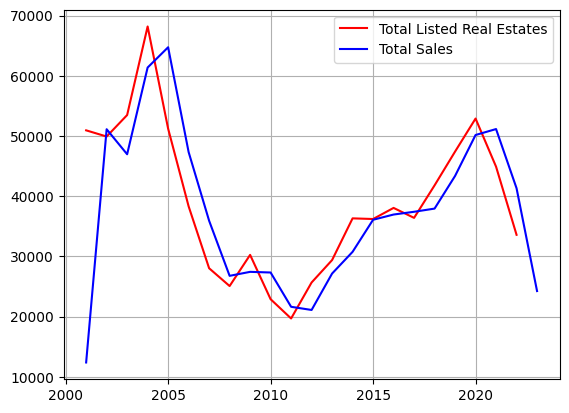

In [51]:
yearCounts = dataset['Sales Year'].value_counts()
xYears = yearCounts.index.astype(int)
yYears = yearCounts.values
sorted_indices = xYears.argsort()
xYears = xYears[sorted_indices]
yYears = yYears[sorted_indices]
listCounts = dataset['List Year'].value_counts()
xList = listCounts.index.astype(int)
yList = listCounts.values
sorted_indices1 = xList.argsort()
xList = xList[sorted_indices1]
yList = yList[sorted_indices1]
plt.plot(xList, yList, linestyle="-", color="red", label = "Total Listed Real Estates")
plt.plot(xYears, yYears, linestyle="-", color="blue", label = "Total Sales")
plt.legend()
plt.grid(True)
plt.show()

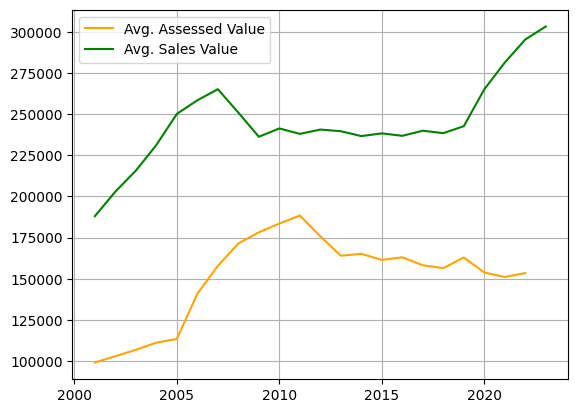

In [52]:
average_sales_per_year = dataset.groupby('Sales Year')['Sale Amount'].mean()
avg_assessed_value_per_year = dataset.groupby('List Year')['Assessed Value'].mean()
plt.plot(avg_assessed_value_per_year.index, avg_assessed_value_per_year.values, linestyle='-', color="orange", label="Avg. Assessed Value")
plt.plot(average_sales_per_year.index, average_sales_per_year.values, linestyle='-', color="green", label="Avg. Sales Value")
plt.legend()
plt.grid(True)
plt.show()

### Pie Chart

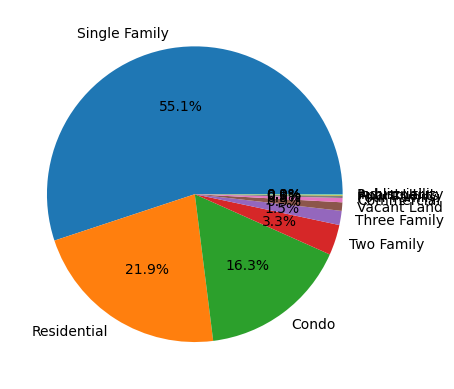

In [53]:
filtered = dataset[dataset['Property Type'] != "Unknown"]
pieLabels = filtered['Property Type'].value_counts().index
pieSizes = filtered['Property Type'].value_counts().values
fig, ax = plt.subplots()
ax.pie(pieSizes, labels=pieLabels, autopct='%1.1f%%')
plt.show()

### *Observation 3:*

* Real estate listings and sales were highest during 2004-2005 and 2019-2020, while 2011-2012 saw the lowest activity.
* Average Assessed Value peaked in 2011 at (180,000), then stabilized around (170,000).
* Average Sales Value rose to (270,000) by 2007, declined slightly, and then surged past $300,000 after 2023.
* Most real estates listed were single-family homes.